In [1]:
import numpy as np
from scipy.stats import norm, t

import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
plt.style.use('fivethirtyeight')
import check_lab00 as p

# ME 3263 - Laboratory # 0
## Introduction to the Student t-test

We use statistics to draw conclusions from limited data. No measurement is exact. Every measurement you make has two types of uncertainties, *systematic* and *random*. *Systematic* uncertainties come from faults in your assumptions or equipment. 
*Random* uncertainties are associated with unpredictable (or unforeseen at the
time) experimental conditions. These can also be due to simplifications of your
model. Here are some examples for caliper measurements:

In theory, all uncertainies could be accounted for by factoring in all physics
in your readings. In reality, there is a diminishing return on investment
for this practice. So we use some statistical insights to draw conclusions. 

## Mean and standard deviation

If the same measurement is taken multiple times, then there should be some average value, the mean, $\mu$. If there is an average value, then that means there is also a measure of deviation from the average value, standard deviation, $\sigma$. The definitions for mean and standard deviation are as such

$\mu = \sum_{i=1}^{N}\frac{x_{i}}{N}$

and

$\sigma^2 = \frac{\sum_{i=1}^{N}(x_{i}-\mu)^2}{N}$,

where $x_i$ is the $i^{th}$ measurement in a dataset called $x$ and $N$ is the number of data points. 

If you know the mean and standard deviation of a normally distributed data set, then you can predict the probability a given measurement will occur. The [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) for the difference between measurement $x_{i}$ and $\mu$ is shown below for $\sigma=1$. 


Text(0, 0.5, 'Probability of\\\\ Measurement (\\%)')

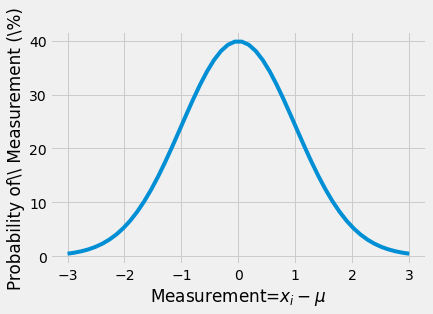

In [2]:
x=np.linspace(-3,3)
y=norm.pdf(x,0,1)*100 # convert fraction to percent
plt.plot(x,y)
plt.xlabel('Measurement=$x_i-\mu$')
plt.ylabel(r'Probability of\\ Measurement (\%)')

Half of the measured values are above the mean, $\mu$, and half below. To determine the number of times any given range of values would be measured, you can integrate the probability density function between two measurements, for example $\mu\pm\sigma$ the mean plus or minus the standard deviation. This distribution is the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) shown below.

Text(0, 0.5, 'Probability \\\\ Measurement $<x_i$ (\\%)')

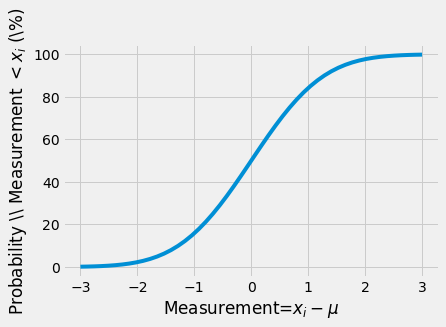

In [3]:
x=np.linspace(-3,3)
y=norm.cdf(x,0,1)*100 # convert fraction to percent
plt.plot(x,y)
plt.xlabel('Measurement=$x_i-\mu$')
plt.ylabel(r'Probability \\ Measurement $<x_i$ (\%)')

## The problem

If we take anything less than an infinite number of measurements, then the mean and standard deviation, $\mu$ and $\sigma$, are subject to random noise. Take the following five data sets of 20 normally distributed random numbers with $\mu=10$ and $\sigma=1$. 

In [4]:
for i in range(0,5):
    data=np.random.normal(10,1,20) # generate 20 random numbers with true mean of 10 and true std of 1
    # print the mean and standard deviation
    print('data mean=%1.3f, standard deviation=%1.3f'%(np.mean(data),np.std(data)))
    

data mean=9.858, standard deviation=1.154
data mean=10.057, standard deviation=1.147
data mean=9.605, standard deviation=1.065
data mean=10.058, standard deviation=0.974
data mean=10.193, standard deviation=0.941


Each average and standard deviation is subject to random noise (here the noise is artificially created by python). 

## Problem #1

Try creating 100 normally disributed random numbers with an average of 10 and standard deviation of 1. How close is the average to 10? How close is the standard deviation to 1?

In [5]:
data # enter your work here
pts=p.check_p01(data)


Whoops, try again


## The solution - the Student t-test

[William S. Gossett](https://en.wikipedia.org/wiki/William_Sealy_Gosset) was working for Guinness in 1908 when he found a solution to the small sample size problem. Guinness insisted his work be kept secret, so he published on the pseudonym, student. Now we refer to his solution as the "Student t-test". 

We can use the Student's t-distribution to:
1. Establish confidence limits for the mean estimated from smaller sample sizes. This will give us error bars

2. Test the statistical significance of the difference between means from two independent samples. 

### 1 - Confidence intervals

The confidence interval for a given data set is calculated with the mean, $\mu$, standard deviation, $\sigma$, number of data points $N$, and t-statistic $t=f(\sigma, N)$. The equation for the confidence interval of a small data set is as such

x=$\mu \pm t(C.I.,df)\frac{\sigma}{\sqrt{N}}$,

where x is the measured quantity, C.I. is the chosen confidence interval (95% here), df=N-1 is the degrees of freedom, and $t\sigma/\sqrt{N}$ is an estimated true standard deviation. For example, lets look at the previous data set of $\mu=10$ and $\sigma=1$. Notice the confidence interval increases. 

In [6]:
N=20
tstat=t.interval(0.95, N-1) # calculate the 95% interval t-statistic
for i in range(0,5):
    data=np.random.normal(10,1,N) # generate N random numbers with true mean of 10 and true std of 1
    # print the mean and standard deviation
    mu=np.mean(data)
    sigma=np.std(data)
    N=len(data)    
    print('data confidence interval is %1.3f +/- %1.3f'%(mu,tstat[1]*sigma/np.sqrt(N)))

data confidence interval is 9.559 +/- 0.372
data confidence interval is 10.082 +/- 0.491
data confidence interval is 9.996 +/- 0.471
data confidence interval is 9.806 +/- 0.442
data confidence interval is 9.934 +/- 0.570


In [7]:
def convergence_of_mean(N):
    x=np.linspace(-3,3)
    y=norm.pdf(x,0,1) # convert fraction to percent
    plt.plot(x,y)
    y_sample=np.random.normal(0,1,N)
    tstat=t.interval(0.95, N-1)
    CI=tstat[1]*sigma/np.sqrt(N)
    plt.hist(y_sample,density=True)
    plt.vlines([np.mean(y_sample)-CI,np.mean(y_sample)+CI],0,0.4)
    plt.xlabel('Measurement=$x_i-\mu$')
    plt.ylabel(r'Probability of\\ Measurement (\%)')
    plt.axis([-3,3,0,0.5])
    
interact(convergence_of_mean,N=(10,1000))
print('Black bars show confidence interval based upon N measurements')
print('Use the slider to change the number of samples, N')

interactive(children=(IntSlider(value=505, description='N', max=1000, min=10), Output()), _dom_classes=('widge…

Black bars show confidence interval based upon N measurements
Use the slider to change the number of samples, N


The interactive plot above generates `N` normally distributed numbers and plots the histogram with two vertical lines to indicate the confidence interval of the measured mean. More measurements, larger `N`, produce a smaller interval, even though the standard deviation is constant. 

## Problem #2

Try creating 100 normally disributed random numbers with a true average of 10 and true standard deviation of 1. What is the confidence interval for the measured average? Is it higher or lower than the confidence interval for 20 samples?

In [8]:
N=100
data # =... enter your work here
tstat# =... enter your work here
avg #  =... enter your work here
std#  =... enter your work here
conf_interval = tstat[1]*std/np.sqrt(N)

p.check_p02(avg,conf_interval)

NameError: name 'avg' is not defined

### 2 - Difference between means
We will use the t test for independent samples. Each group can have different number of measurements. We assume that the population has a normal distribution if we could make infinite measurements. The student t-test tests the null hypothesis. 

*null hypothesis for given data: there is no difference between the two sample means*

The t-test is based upon the means $\mu_1$ and $\mu_2$, standard deviations, $\sigma_1$ and $\sigma_2$, and number of data points, $N_1$ and $N_2$. The t variable for sets of independent variables based upon the difference in means between sample sets as such

$t=\frac{|\mu_1-\mu_2|}{\sqrt{AB}}$

$A=\frac{N_1+N_2}{N_1 N_2}$

$B=\frac{(N_1-1)\sigma_1^2+(N_2-1)\sigma_2^2}{N_1+N_2-2}$

Let's use the same random numbers from the previous examples and examine two sets of data and compare to the t-distribution table.

**df=18**

|p=0.05 | p=0.025 | p=0.01 | p=0.005 |
|--- | --- | --- | --- |
|2.10|2.45|2.88|3.20|

In [ ]:
N=200
data1=np.random.normal(10,1,N)
data2=np.random.normal(10,1,N)

mu1=np.mean(data1); mu2=np.mean(data2)
sigma1=np.std(data1); sigma2=np.std(data2); 
N1=N2=N

A=np.abs(N1+N2)/(N1*N2*1.0)
B=((N1-1)*sigma1**2+(N2-1)*sigma2**2)/(N1+N2-2)

tstat=np.abs(mu1-mu2)/np.sqrt(A*B)

print('t=%1.2f'%tstat)

df=2*N-2

# Print out the table for df degrees of freedom (N1+N2-2)
print('df=%i'%N )
print('| p=0.05 | p=0.025 | p=0.01 | p=0.005 |')
print('|    --- |     --- |    --- |     --- |')
print("| %1.2f   | %1.2f    | %1.2f   | %1.2f    |"%(t.interval(0.95, df)[1],\
                                                     t.interval(0.975, df)[1],\
                                                     t.interval(0.99, df)[1],\
                                                     t.interval(0.995, df)[1]))

Our t-statistic is lower than even the p=0.05 confidence interval. This indicates that we cannot reject the null hypothesis. Based upon the current data set, there is no measured difference between the two sample averages. This makes sense because the two sample means should be the same. We just used two random data sets with the same average and same standard deviation. 

## Problem 3

Try changing the mean between samples. What happens to the value of tstat?

At what point does the t-statistic become statistically significant? Keep the standard deviations, $\sigma=1$, and vary the averages for `data1` and `data2`, shown above as `10` and `10`. With 200 samples, can you reliably measure the difference between 10 and 11? or 10 and 10.1? 

Create two datasets, `data1` and `data2` that *are* different, statistically with p$\le 0.05$, but have means within 10% of each set. 



In [ ]:
data1 #=
data2 #=
p.check_p03(data1,data2)

## Data to analyze - Marble Madness Design Problem

Your company manufactures marbles with glass. There was a mix-up with the glass delivery and all of the affected marbles are at higher risk of shattering. The faulty glass has a slightly different density, $\rho_{faulty}$=2.80 g/cm$^3$, than your normal manufacturing glass, $\rho_{mfg}$=2.52 g/cm$^3$. 

You take 15 samples from three bins: A, B, and C. You know that bin A is the correct glass, but bins B and C might have the faulty glass. Write a report that clarifies whether bins B and C are safe to ship using the student t-test and creating confidence intervals for the three bins' samples. 

|mass(g) A |mass(g)  B|mass(g)  C|
|---|---|---|
|34.6| 40.3| 56.1|
|40.7| 35.0| 59.3|
|37.5| 43.7| 51.4|
|45.8| 43.2| 50.2|
|41.4| 41.1| 46.4|
|44.2| 42.3| 56.1|
|44.5| 39.8| 43.1|
|51.8| 39.2| 55.1|
|47.5| 49.4| 46.9|
|45.4| 43.2| 39.9|
|36.4| 44.4| 51.8|
|46.2| 44.8| 46.2|
|43.0| 44.5| 49.7|
|43.3| 50.1| 54.9|
|42.0| 47.1| 64.5|

## Your Report 

1. Introduction

  a. What is the problem and how can you solve it? 
  
  b. What is the student t-test?

  c. What assumptions are used in the student t-test?

  d. What do the results of the t-test tell you?

  e. Why would you use the student t-test?
   
2. Methods

  a. Description of materials and measurements
  
  b. Description of t-test procedure

  c. If someone repeated the experiment he/she would read only this section

3. Results and Discussion

  a. Present experimental results succinctly

  b. Present propagation of error clearly

  c. Interpret results clearly

  d. Compare the averages and confidence intervals for bins A, B, and C
  
  e. Describe the student t-test results, how confident is you rejection/non-rejection of the null hypothesis

4. Conclusion

  a. Is this a good method to use for this application?
  
  b. How could we make it better?

  c. What other applications would benefit from this technique/these results?



**Links of Interest and References**

\[0\] Student. (1908). [The probable error of a mean](./student_error-of-mean.pdf). Biometrika, 1-25.

\[1\] ['Student's' t Test (For Independent Samples)
](https://www.ruf.rice.edu/~bioslabs/tools/stats/ttest.html)

\[2\] [t-based Confidence Interval for the Mean](http://www.stat.wmich.edu/s216/book/node79.html)

\[3\] [Confidence intervals,
t tests,
P values](http://evolution.gs.washington.edu/gs560/2011/lecture3.pdf)

\[4\] [Student's t-test](https://serc.carleton.edu/introgeo/teachingwdata/Ttest.html)

\[5\] Sehgal, J., & Ito, S. (1999). [Brittleness of glass](./brittleness_of_glass.pdf). Journal of non-crystalline solids, 253(1-3), 126-132.